# <span style="color:#2c061f"> Macro 318: Tutorial #2 </span>  

<br>

## <span style="color:#374045"> Data, Stats and Math with Julia </span>


#### <span style="color:#374045"> Lecturer: </span> <span style="color:#d89216"> <br> Dawie van Lill (dvanlill@sun.ac.za) </span>

# Introduction

In this tutorial we will start our discussion with how to work with data in Julia. We will then cover some basic statistics and in the last section move on to some fundamental ideas in mathematics (mostly related to calculus).  

Please note that working with data in Julia is going to be different than working with data in Stata. I am just showing basic principles here so that you are aware of them. You do not need to memorise everything in this notebook. It is simply here as a good reference to have if you want to do some useful data work for macroeconomics. 

If you are more comfortable with Stata for working with data then you can continue on that path. I am simply offering an alternative. 

In the job market there are a few languages that are used for data analysis. The most popular ones are Stata, R, Python and Julia. At this stage Julia is not the most popular for data work, but it shares similarities with Python. So if you know Julia well, it will be easy to pick up Python. Julia is more popular for work related to numerical / scientific computation, which we will cover in some of the future tutorials. 

As an aside, you might be wondering why we chose Julia for this course. There are several reasons, but primarily it is because the language is easy to learn and is similar in syntax to Python. It is also blazingly fast!

Why not learn Python then? Well, we considered this, but Julia is a just a bit easier to get started with and easier to install for most people. And also, it is super fast! I also believe that it is a language that will be used a lot in economics in the future, with a lot of macroeconomists starting to use it for their modelling purposes. 

If you are interested in Python as an alternative to Julia you can always contact me and I can refer you to some resources. However, for most students it is more important to get the programming principles right without worrying too much about the language that they are using. 

In [105]:
import Pkg

In [145]:
Pkg.add("CategoricalArrays")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("DataFramesMeta")
Pkg.add("Downloads")
Pkg.add("ForwardDiff")
Pkg.add("GLM")
Pkg.add("Plots")
Pkg.add("Random")
Pkg.add("RDatasets")
Pkg.add("Roots")
Pkg.add("ShiftedArrays")
Pkg.add("Statistics")
Pkg.add("Symbolics")
Pkg.add("Zygote")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Chan

In [146]:
using CategoricalArrays
using CSV
using DataFrames
using DataFramesMeta
using Downloads
using ForwardDiff
using GLM
using Plots
using Random
using RDatasets
using Roots
using ShiftedArrays
using Statistics
using Symbolics
using Zygote

# Working with data

The primary package for working with data in Julia is `DataFrames.jl`. For a comprehensive tutorial series on this package I would recommend Bogumił Kamiński's [Introduction to DataFrames](https://github.com/bkamins/Julia-DataFrames-Tutorial).

# DataFrames basics

In this section we discuss basic principles from the DataFrames package. For the first topic we look at how to construct and access DataFrames. The fundamental object that we care about is the `DataFrame`. This is similar to a `dataframe` that you would find in R or in Pandas (Python).

DataFrames are essentially matrices, with the rows being observations and the columns indicating the variables. 

## Constructors

The easiest thing to construct is an empty DataFrame. 

In [ ]:
DataFrame() # empty DataFrame

You could also construct a DataFrame with different keyword arguments. Notice the different types of the different columns. 

In [ ]:
DataFrame(A = 2:5, B = randn(4), C = "Hello")

One of the most common ways to use constructors is through arrays. 

In [ ]:
commodities = ["crude", "gas", "gold", "silver"]
last_price = [4.2, 11.3, 12.1, missing] # notice that the last value is missing

df = DataFrame(commod = commodities, price = last_price) # give names to columns

One can also easily add a new row to an existing `DataFrame` using the `push!` function. This is equivalent to adding new observations to the variables. 

In [ ]:
new_row = (commod = "nickel", price = 5.1)
push!(df, new_row)

One could also use array comprehensions to generate values for the DataFrame,  

In [ ]:
DataFrame([rand(3) for i in 1:3], [:x1, :x2, :x3]) # see how we named the columns

You can also create a DataFrame from a matrix, 

In [ ]:
x = DataFrame(rand(3, 3), :auto) # automatically assign column names

Incidentally, you can convert the DataFrame into a matrix or array if you so wished, 

In [ ]:
Matrix(x)

In the next section we talk about accessing the element of a DataFrame as well as looking at some basic information about the DataFrame that we have on hand.  

## Accessing data

Once we have our data set up in a DataFrame, we are often going to want to know some basic things about the contents. Let us construct a relatively large DataFrame. Most of the time we will be working with large datasets in economics, with thousands of rows and columns. You might be used to working with data in Excel, so things might feel foreign right now. However, I promise that once you start working with data in a programming language such as R, Julia or Python, your productivity will greatly increase. You only need to get over that initial apprehension on learning something new. 

In [ ]:
y = DataFrame(rand(1:10, 1000, 10), :auto);

We can get some basic summary statistics on the data in the DataFrame using the `describe` function. 

In [ ]:
describe(y)

If we want to take a peak at the first few rows of the data we can use the `first` function. 

In [ ]:
first(y, 5) # first 5 rows

There are multiple ways to access particular columns of the DataFrame that we have created. The most obvious way is to to use `y.col` where `col` stands for the column name. This provides us the column in vector format. 

In [ ]:
y.x2; # get a single column

Another interesting way to access the column is the following, 

In [ ]:
y[!, :x2]; # or y[!, 2] or y[:, :x2]

You can access several columns (the first two in this case) with the following command, 

In [ ]:
y[:, [:x1, :x2]];

Getting rows is also quite easy (and similar to the way in which we access rows in arrays), 

In [ ]:
y[1, :]

With the code above you can also easily change the values in the DataFrame. We could, for example, multiply each of the values in the second column by $2$ if we wanted. 

In [ ]:
first(y.x2, 2) # observe first two values in the column

In [ ]:
z = y[!, :x2]; 
z *= 2; # multiply column by two

first(z, 2) # observe newly mutated column

In [ ]:
first(y.x2, 2) # important to note that this is unchanged

# Importing data

Now let us import some data and play around with it a bit. This is generally referred to as data wrangling. If you want to become a data scientist, then significant portion of your work is going to involve gathering and cleaning data. The analysis part only makes up a small percentage. 

I have created a dataset that is hosted on github at the following location -- https://github.com/DawievLill/Macro-318/blob/main/data/tut2_data.csv

Now let us download this data with Julia. This is one possible way to do it. 

In [ ]:
Downloads.download(
    "https://raw.githubusercontent.com/DawievLill/Macro-318/main/data/tut2_data.csv", 
    "tut2_data.csv"
)

Now get the data into Julia!

In [ ]:
sa_data = DataFrame(CSV.File("tut2_data.csv", dateformat = "yyyy/mm/dd")) # specify the date format

Alternatively, we could have done the following, since we know the data is located in the `data` folder, 

In [ ]:
sa_data_1 = DataFrame(CSV.File("../data/tut2_data.csv")); # if you don't understand this piece of code, you can simply move on. 

So we have succesfully imported data into Julia. What can we do with this data? We see that the data contains information on GDP, the repo rate, CPI and inflation. The first thing that we might want to do is visualise the data. This is always a good first step. After that we might want to look at some basic descriptive statistics, to get an idea of the properties of the data. 

## Plotting the data

For us to plot the data let us look at one the variables in the dataset. 

Let us consider GDP, which is the second column in the dataset. We can access GDP by calling the variable name, but we can also use the fact that it is located in the second column of the table. 

In [ ]:
gdp_1 = sa_data.gdp;
gdp_2 = sa_data[!, 2];
gdp_3 = sa_data[!, :gdp];

We can check whether these variables give the same result as follows, 

In [ ]:
gdp_1 == gdp_2 == gdp_3 # check that these give exactly the same result

Now let us draw a basic plot of GDP and see if it aligns with your expectation of what GDP would look like in level terms. You can also compare this with US GDP in Chapter 2 of the Williamson textbook. I have used **nominal GDP** in this dataset. 

We will compare nominal with real GDP soon, with a simple calculation involving the inflation rate (although technically we should be using the GDP deflator to move from nominal to real terms).  

In [ ]:
date_sa = sa_data[!, :date]
plot(date_sa, gdp_1, legend = false, lw = 1.5)

One of the most popular transformations of GDP data is to take a natural logarithm. The reason for this is that differences between adjacent values in the GDP series represent growth rates once the series is "logged". We will get back to this point at a later stage. If we take a natural log of the series then the plot of GDP looks as follows, 

In [ ]:
log_gdp = log.(gdp_1); # remember the dot syntax, since we are broadcasting the log over all the values of GDP

In [ ]:
plot(date_sa, log_gdp, legend = false, lw = 1.5)

You will see that the scale on the y-axis has changed after this transformation. The slope of this graph indicates the growth rate. A point that we will touch on soon. 

We can also plot some of the other variables in our dataset, such as the inflation rate. 

In [ ]:
inflation_rate = sa_data.inflation
plot(date_sa, inflation_rate, legend = false, lw = 1.5)
plot!([0], legend = false, lw = 1.5, seriestype = :hline, color = :black, ls = :dash, alpha = 0.5)

# Descriptive statistics

Some of the most widely used statistics are the mean (average) and standard deviation. They can be easily computed with the computer as follows,  

In [ ]:
inflation_1 = sa_data[!, :inflation] # select the inflation column
mean(inflation_1) # mean value of inflation

In [ ]:
std(inflation_1) # standard deviation of inflation

Let us plot a histogram for the data and also indicate where the mean is in this plot. 

In [ ]:
histogram(inflation_1, legend = false, alpha = 0.5, bins = 20) # a histogram gives a general idea of what the distribution of values for inflation looks like.
plot!([mean(inflation_1)],  seriestype = :vline, lw = 3, colour = :black, ls = :dash) # plots the mean value

# Growth rates

Mathematics is so much easier when we get to use a computer. In this section I will introduce some of the basic mathematical theory that you need as a macroeconomist and then we will show you how that relates to programming.

Computing growth rates is quite important in macroeconomics. This is something that you will frequently encounter and it is important to know how to do this. The growth rate between subsequent two dates can be calculated as follows, 

$$
\left(\frac{Y_{t} - Y_{t-1}}{Y_{t-1}}\right) \times 100 = \left(\frac{Y_{t}}{Y_{t-1}} - 1\right) \times 100 
$$


If you are working with quarterly data and want to calculate the growth rate from one quarter to the same quarter next year then you should use, 

$$
\left(\frac{Y_{t}}{Y_{t-4}} - 1\right) \times 100 
$$

In addition, we can calculate the monthly or quarterly growth rate at an annual rate, 

$$
\left(\left[\frac{Y_{t}}{Y_{t-1}}\right]^{n} - 1\right) \times 100 
$$
where $n = 4$ represents quarterly growth and $n = 12$ gives monthly growth. 

Finally, we can calculate the average growth rate over $n$ years with the following formula, 

$$
\left(\left[\frac{Y_{t}}{Y_{t-n}}\right]^{1/n} - 1\right) \times 100 
$$

### Examples of growth rate calculations

Let us try calculating some growth rates with the data at hand. We will focus on GDP growth rates for this example, 

In [ ]:
gdp_first = sa_data[1, :gdp]; # first value of the GDP series
gdp_second = sa_data[2, :gdp]; # second value of the GDP series

gdp_growth_1 = ((gdp_second - gdp_first)/gdp_first) * 100 # using the formula for growth between two periods. 

There is an alternative way to calculate an approximation to the growth rate from above. We can simply take the natural logarithm of the two values and subtract them from each other. In other words we have that, 

$$
\left(\frac{Y_{t}}{Y_{t-1}} - 1\right) \times 100 \approx \log(Y_{t}) - \log(Y_{t-1}) \times 100
$$


In [ ]:
(log(gdp_second) - log(gdp_first)) * 100

The values are not exactly the same. This is simply an approximation which is often used in practice. 

As another example, let us calculate the quarterly growth rate of GDP and then plot the resulting values. This calculation is a bit more tricky since we are now going to apply it to the entire dataset. Let me explain the logic of what we are going to do here. 

First, we are going to create a new column that contains a lagged version of the original column for GDP. Why do we want to do this? The reason is that we want to be able to divide $Y_t$ by $Y_{t-4}$ from our formula above. However, we only have values for $Y_t$ in the $t$-th column and not $Y_{t-4}$. So for every row we need to create a corresponding lagged version of the original column. Before we do anything, let us take a look at the first few values of the dataset to see what we need to change. We only care about the first two columns, so we will only select those. 

In [ ]:
first(sa_data[!, 1:2], 8)

In [ ]:
sa_data.lagged_gdp = lag(sa_data[!, 2], 4);

We can see that the lagged GDP column has successfully been created and added to the DataFrame. 

In [ ]:
first(sa_data[!, :], 8) 

Now we can calculate the growth rate, 

In [ ]:
gdp_growth_quarterly = (log.(sa_data.gdp) .- log.(sa_data.lagged_gdp)) .* 100; # log method
gdp_growth_quarterly_1 = ((sa_data.gdp ./ sa_data.lagged_gdp) .- 1) .* 100; # formula method

In [ ]:
plot(date_sa, gdp_growth_quarterly, legend = false, lw = 2, alpha = 0.7) # log method
plot!(date_sa, gdp_growth_quarterly_1, legend = false, lw = 2, ls = :dash, color = :black) # formula method

For the other formulas you can perform similar calculations. As an exercise you can attempt to use the other formulas to calculate annualised growth rates. 

# Basic math for macroeconomics

In this section we will be discussing very basic mathematical concepts that relate to mathematical modeling. For this section we will be making heavy use of the notes on mathematics for economists by [Fan Wang](https://fanwangecon.github.io/Math4Econ/). Please go look at his website for more cool notes and give his repository a star. His code is mostly in Matlab, but he also has some Python and R code. You can easily translate Matlab to Julia, since the syntax of the languages are quite similar.  



## Functions

A function is a **rule** that assigns to every element of $x \in X$ a **single element** of the set $Y$. This is written as, 

$$
f:X \rightarrow Y
$$

The arrow indicates the mapping from the one set to another. When we write $y = f(x)$ we are mapping from the argument $x$ in the domain $X$ to a value in the co-domain $Y$. 

It is important to note that for a function we are assigning a single element from the set $X$ to the set $Y$.

Let us illustrate this with some examples of functions and non-functions in Julia. 

In [ ]:
x = 0:π/100:2π
y = sin.(x)

plot(x, y, title = "This is a function", legend = false, lw = 2)

The function above is a portion of the $\sin$ function over the interval from $0$ to $2\pi$. However, the following graph that depicts a circle is not a function. It is a relation, but NOT a function. Can you see why this is the case? What is the defining feature of a function?

In [ ]:
x = 1; y = 1; r = 1
θ = 0:π/50:2π

x_unit = r .* cos.(θ) .+ x
y_unit = r .* sin.(θ) .+ y

plot(x_unit, y_unit, title = "This is NOT a function", legend = false, lw = 2)

A linear function, which is also known as polynomial of degree 1 has slope $m$ and intercept $b$. Linear functions have constant slope. We will encounter the idea of slope again later when we talk about derivatives. 

In [ ]:
m = 0.5 # slope
b = 1 # intercept

ar_x = LinRange(-5, 10, 100)
ar_y = ar_x .* m .+ b

plot(ar_x, ar_y, legend = false, title = "Linear function with slope $m and intercept $b", lw = 2)

vline!([0], ls = :dash, color = :black, alpha = 0.5, xticks = ([-2]))
hline!([0], ls = :dash, color = :red, alpha = 0.5, yticks = ([1]))

In high school you probably determined the slope of this function using a the method of rise over run. In other words, the change in $y$ over the change in $x$. More "formally", you calculated $m = \frac{\Delta{y}}{\Delta{x}}$. In this example, $\Delta{y} = 1 - 0$ and $\Delta{x} = 0 - (-2)$, so we have that $m = 1 / 2 = 0.5$. We will talk about this method of using a difference quotient again when we want to calculate the slope of a tangent line to a function in the section on derivatives. 

## Monomials and polynomials


Functions that take the form $a \cdot x^{k}$ are considered **monomials**. In this case $a$ is any real number and $k$ is a positive integer. The value of $k$ represent the degree of the monomial. Monomials can be added together to form **polynomials**. A general formulation for a polynomial of degree four would be, 

$$
a + b\cdot{x} + c \cdot x^2 + d \cdot x^3 + e \cdot x^4
$$

where the coefficients $a, b, c, d, e$ could be positive or negative. In order to determine the degree of the polynomial, consider the monomials that constitute the polynomial. The monomial with the highest degree determines the degree of the whole polynomial. An explicit representation of a polynomial that you should all know quite well is something along the following lines, 

$$
y = 2 + 5x^2
$$

Can you identify what the degree of this polynomial is? Let us plot some polynomials to get an idea of what they look like. 


In [ ]:
x = -1:0.01:1
y = 2 .+ 5 .* x .^ 2

plot(x, y, legend = false, title = "Polynomial of degree two", lw = 2)

Let us plot a polynomial of a degree three to see how this might differ. 

In [ ]:
x = -3:0.01:3
y = 2 .- 1 .* x .^ 2 .- 10 .* x .^ 3

plot(x, y, legend = false, title = "Polynomial of degree three", lw = 2)

## Local and global maximum

A function $f$ has a global maximum at $x^{*} \in X$ if for all $x \in X$, $f(x) \leq f(x^{*})$. A function $f$ has a local maximum at $x^{*} \in X$ if there exists and open interval $(a, b)$ such that $x^{*} \in (a, b)$, and for all $x \in (a, b), f(x) \leq f(x^{x})$. Not all functions have a maximum. 

We are going to be dealing with functions such as utility functions, production functions and budget constraints in many of our economics models. 

As an example, in the case of a utility function the household is choosing the bundle of goods that provides the highest level of utility. 

Most production and utility functions will NOT have a local or global maximum. 

In the case of a log-utility function, higher consumption will give higher levels of utility, so no maximum exists here either. 

If we have a Cobb-Douglas production function, then output will increase with labour and capital. This means that the function is even increasing in its inputs and has not maximum. 

**NB**: It is only when we combine our preferences with a budget that we will be able to think about the optimal bindle choice given a fixed budget. The maximisation problem in this case will reveal some maximum. We will cover this example at length in the next tutorial. 

### Quadratic utility

There is one nice utility function that has a maximum, the quadratic utility function. 

$$
U(x) = x - \alpha \cdot x^2
$$

We can quickly draw a plot of this utility function and by inspection determine where the maximum is going to be. The most efficient way to determine the maximum would be using a derivative and setting it equal to zero. However, we haven't introduced derivatives yet, so let us use this inefficient way to determine the maximum for now. 

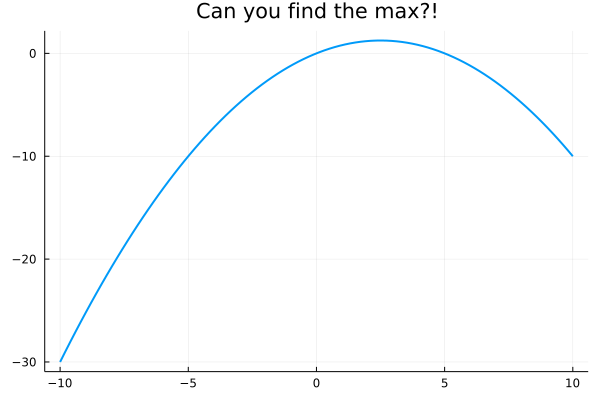

In [108]:
npoints = 100
a, b = (-10, 10)
x = range(a, b, length = npoints)
α = 0.2 

U(x) = x .- α .* x .^ 2

plot(x, U.(x), legend = false, lw = 2, title = "Can you find the max?!")

As you can see, we can approximately guess from the graph where the highest value for this graph is going to be. It be somewhere in the interval between 10 and 15. However, this is not precise enough. We need some method to give us the exact answer, this is where derivatives will enter. Another approach is just to consider each of the utility values and then pick the maximum from the list. Luckily Julia has a function called `findmax()` that can do this for us. 

Don't worry too much about the code for now, this won't make too much sense at first. I will try and explain the basic idea, but if you don't get it don't worry. Try and come back to this code at a later stage once you are more familiar with programming in Julia. Then try and evaluate every line and see if you can make sense of what is happening here. 

In [116]:
fmax, ix = findmax(U.(x))	

(1.249872461993674, 63)

We can see from above that if we evaluate our utility function with the `findmax()` function a tuple is returned. The first value in the tuple is the function output at the maximum. In other words it is the value of utility where this function is maximised. It is the value on the y-axis. The second value in the tuple is the position in the list of $x$ values that we evaluated. If we go back in our code you will see that we created a range of $x$ values in the interval $-10$ to $10$. We created a grid of 100 points within the interval (generated 100 potential values for $x$) and inserted those $x$ values into the utility function at each of the given points. 

According to the `findmax()` function, the 63rd value in in that grid of $x$ values was the one that maximised the function. This is also referred to as the $\argmax$ in mathematics. We can then find the $x$ value by looking at `x[ix]`, which is basically the same as `x[63]` in this case. Remember how to access elements in an array from the previous tutorial. 

In [118]:
x[ix] == x[63]

true

The maximum here is $2.52525252 \ldots$. If we chose a finer grid for $x$ we would be able to get a better approximation for the true value that maximises this function.

In [120]:
x[ix] 

2.525252525252525

In the graph below we simply draw a scatter plot with the $x$ value being represented by the 63rd point in the $x$ vector.

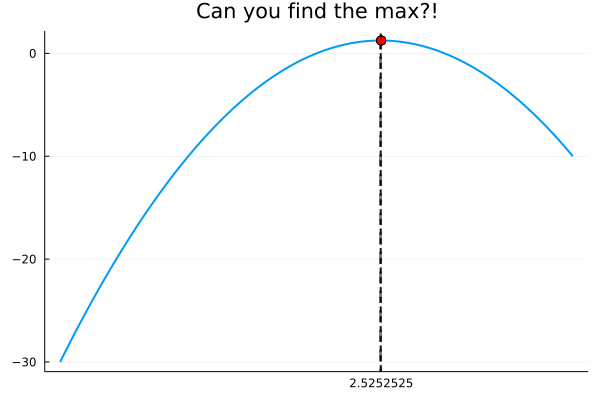

In [121]:
scatter!([x[ix]], [fmax], color = :red, ms = 5)
vline!([x[ix]], lw = 1.5, color = :black, ls = :dash, alpha = 0.5, xticks = ([x[ix]]))

## Derivatives

Linear functions have a constant slope, as we have seen in one of the earlier examples. However, what about non-linear functions? What is the rate of change for a non-linear function as we move along its domain?

Let $(x_0, f(x_0))$ be a point on the graph of $y = f(x)$. The derivative of $f$ at the point $x_0$ is the slope of the tangent line to the graph of $f$ at $(x_0, f(x_0))$. We can denote this derivative of a function $f$ at $x_0$ as

$$
f'(x_0) = \frac{df(x_0)}{dx} = f_{x}(x_0)
$$

The notation above is interchangeable. The derivative is defined formally as, 

$$
f'(x_0) = \lim_{h \rightarrow 0} \frac{f(x_{0} + h) - f(x_0)}{h}
$$

In taking derivatives we normally revert to the derivative rules. The derivative rules are the following, 

1. Constant rule
2. Power rule
3. Chain rule
4. Sum (difference) rule
5. Product rule
6. Quotient rule (we won't cover this, since you can use the product rule if needed)

Then we can also speak of the exponential and log rule for derivatives. These are ones that will be frequently used. Let us have a brief discussion and examples of each of the rules. We will also accompany the solutions that are written out by hand with a solution generated by the computer to check that we are correct in our calculation. 

It is important to note that there are several ways in which you can take derivatives on the computer. The primary methods are, 

1. Symbolic differentiation
2. Automatic differentiation
3. Numerical differentiation

We will not be going into detail on how these methods work. We will just use them in practice. We will show the symbolic and automatic differentiation approaches in this tutorial. 

#### Constant rule

If $f(x) = k$ where $k$ is some constant then $f'(k) = 0$. As an application of the constant rule, let us determine the derivative of $f(x) = 8$. 

$$
f'(8) = 0
$$

This is the easiest rule and can be computed in one line. Let us see what the computer does with this example. First we use the `Symbolics` package. 

In [127]:
@variables x
D = Differential(x)

y = 8
D(y) # we can see that this now gives us the correct formulation

Differential(x)(8)

In [130]:
expand_derivatives(D(y)) # solution to the problem -- we see that this is the same as our answer. 

0

Now we try the `Zygote` package. This uses automoatic differentiation. Once again, we will not explain what this method entails. If you want to read more on the topic you are more than welcome, [here](https://github.com/mitmath/18337/blob/master/lecture1/AutoDiff.ipynb) is an interesting notebook. For those that are interested in machine learning and deep learning it will be compulsory to learn more about the concept of automatic differentiation at some point. 

In [153]:
f(x) = 8

f'(x)

We see that there is no answer here. This seems strange. Let us another approach with this rule. We can calculate the gradient at a certain point in another way.  

In [147]:
Zygote.gradient(y -> 8, 8)

(nothing,)

We see that the output is `nothing` here. This shows why we had no output in the previous code. When `nothing` is returned then there will be nothing to display. Another option for automatic differentiation is the `ForwardDiff` package. Let us quickly look at an example with this package. 

In [149]:
ForwardDiff.derivative.(f, 8)

0

In this case we get an answer of zero. Which is more in line with what one would expect. 

#### Power rule

For any positive integer $k$ the derivative of $f(x) = x^{k}$ at $x_0$ is, 

$$
f'(x_0) = k \cdot x_{0}^{k - 1}
$$

An example of this would be the following. Find the answer to 

$$
f'(x) = x ^ 3
$$

What do you think the answer should be? Let us check with the computer to see what we get. First we try symbolic differentiation.

In [150]:
y = x ^ 3
D(y)

Differential(x)(x^3)

In [151]:
expand_derivatives(D(y))

3(x^2)

Does this answer match with what you calculated by hand? Next we try automatic differentiation. 

In [156]:
f(x) = x ^ 3

f'(x) 

3(x^2)

It seems that `Zygote` gives the same answer. Let us evaluate this function at a particular point with `ForwardDiff`.

In [158]:
f'(5) == ForwardDiff.derivative.(f, 5) # evaluated at the point x = 5

true

In [159]:
f'(5)

75

#### Chain rule

The chain rule is a bit more complicated then some of the other rules, but it is used frequently in economics. If we have a function $f(x) = p(q(x)) = (p \circ q)(x)$ which is a composite of two differentiable functions $p(x)$ and $q(x)$ then the derivative at $x_0$ according to the chain rule is, 

$$
f^{\prime } (x_0 )=p^{\prime } (q(x_0 ))\cdot q^{\prime } (x_0 )
$$

A good example of where this is applicable is the function 

$$
f(x) = \sqrt{(5x - 8)}
$$

In this case we have a composition of two functions, $p(x) = \sqrt{x}$ and $q(x) = 5x - 8$. Here we need to take the derivatives separately and combine with our rule. We start with $p'(x)$. We haven't really talked about taking the derivative of a square root. So how do we proceed? Well, our square root can actually be written as $p(x)^{1/2}$. Now we can use our power rule from before to get $p'(x) = \frac{x^{-1/2}}{2}$. Next we need to take the derivative of $q(x)$, which gives is $q'(x) = 5$ using the power rule (since $5 = 5 \cdot x^{(1 - 1)}$). Now we combine all the components as per the chain rule, 

$$
\begin{align*}
f'\left( x \right) & = p'\left( {q\left( x \right)} \right)\,\,q'\left( x \right)\\ 
&  = p'\left( {5x - 8} \right)\,\,q'\left( x \right)\\ 
&  = \frac{1}{2}{\left( {5x - 8} \right)^{ - \frac{1}{2}}}\,\left( 5 \right)\\ 
&  = \frac{1}{{2\sqrt {5x - 8} }}\,\,\left( 5 \right)\\ 
&  = \frac{5}{{2\sqrt {5x - 8} }}\end{align*}
$$

Let us check whether the computer gives the same answers, 

In [160]:
y = sqrt(5x - 8)
D(y)

Differential(x)(sqrt(5x - 8))

In [161]:
expand_derivatives(D(y))

(5//2)*(sqrt(5x - 8)^-1)

In [162]:
f(x) = sqrt(5x - 8)

f'(x) 

5 / (2sqrt(5x - 8))

#### Sum (difference) rule

Given functions $p$ and $q$ that are differentiable at $x$ and with $f(x) = p(x) + q(x)$ we have that the derivative according to the sum rule is given by, 

$$
f^{\prime } (x)=p^{\prime } (x)+q^{\prime } (x)
$$

Let us consider an example with the application of this rule. Find the derivative of $f(x) = 2x^5 + 7$. In this case, $p(x) = 2x^5$ and $q(x) = 7$. 

$$
\begin{align*} 
f'(x)&=\dfrac{d}{dx}\left(2x^5+7\right)\\
&=\dfrac{d}{dx}(2x^5)+\dfrac{d}{dx}(7) & & \text{Apply the sum rule.}\\
&=2\dfrac{d}{dx}(x^5)+\dfrac{d}{dx}(7) & & \text{Apply the constant multiple rule.}\\ 
&=2(5x^4)+0 & & \text{Apply the power rule and the constant rule.}\\
&=10x^4 & & Simplify. 
\end{align*}
$$

As usual, we check the answer on the computer. 

In [163]:
y = 2x^5 + 7
D(y)

Differential(x)(7 + 2(x^5))

In [164]:
expand_derivatives(D(y))

10(x^4)

In [165]:
f(x) = 2x^5 + 7

f'(x) 

10(x^4)

These are the most important rules that we will use the most. The following rules are also used, but less frequently. 

#### Product rule

Given functions $p$ and $q$ that are differentiable at $x$ and with $f(x)=p(x)\cdot q(x)$ we have that the derivative is, 

$$
f^{\prime } (x)=p^{\prime } (x)\cdot q(x)+p(x)\cdot q^{\prime } (x)
$$

Consider the following example, find $f'(x) = (x^2+2)(3x^3−5x)$ by applying the product rule. 

If we set $p(x)=x2+2$ and $q(x)=3x3−5x$, then $p'(x)=2x$ and $q'(x)=9x2−5$ and therefore, 

$$
f'(x)=p'(x)q(x)+q'(x)p(x)=(2x)(3x^3−5x)+(9x^2−5)(x^2+2)
$$

If we simplify this we have $f'(x) = 15x4+3x2−10$

Check against the answer from computer, 

In [167]:
y = (x^2 + 2)*(3x^3 − 5x)
D(y)

Differential(x)((2 + x^2)*(3(x^3) - 5x))

In [171]:
expand_derivatives(D(y))

(2 + x^2)*(9(x^2) - 5) + 2x*(3(x^3) - 5x)

Check against the automatic differentiation answer, 

In [172]:
f(x) = (x^2 + 2)*(3x^3 − 5x)

f'(x) 

2x*(3(x^3) - 5x) + 3(x^2)*(6 + 3(x^2)) - 10 - 5(x^2)

#### Exponential

The exponential function is used a lot in economics. We will often have functions such as $f(x) = \exp(a \cdot x)$. The derivative in this case is given by, 

$$
f'(x) = a \cdot \exp(a \cdot x)
$$

In economics you will find the exponential function in the compounding of interest. The accumulated value of interest that is compounded continuously is given by 

$$
A(t) = Pe^{rt}
$$

If you wanted to take a derivative of this function with respect to the variable $t$ then you would get the following answer, 

$$
A'(t) = r \cdot Pe^{rt}
$$

In [182]:
P = 10; r = 0.05 # choose arbitrary values for P and r

f(x) = P * exp(r*x)

f'(x) 

0.5exp(0.05x)

#### Logarithm

Finally, we have the derivative of a log function, which is used almost everywhere in economics. If we have the function $f(x) = \log(x)$ then the derivative is given by, 

$$
f'(x) = 1 / x
$$

In [183]:
f(x) = log(x)

f'(x)

1 / x

## Higher order derivatives

With these rules you should be able to tackle most problems that involve derivatives. These derivatives that we calculated were first order derivatives. We can actually take the derivative again with respect to the variable of interest and then we would have **second order derivatives**. The second order derivative is then a derivative of the first order derivative. 

While the first order derivative provides a rate of change (often a slope of a tangent line), the second order derivative gives us information on the rate of change of the rate of change. 

### Example: Cobb-Douglas

We can illustrate the usage of derivatives in economics with a basic example. Consider the Cobb-Douglas production function (which we will see again in the notebook on the Solow model). This is a simple explicit form for a production function that we often encounter in economics. The form of the function is as follows, 

$$
F(K,L)=K^{\alpha } \cdot L^{\beta}
$$

where $F$ is the production function and it is a function of the capital ($K$) and labour ($L$) inputs. In order to make this a univariate example, we fix the value of $K$, so that it isn't variable. The derivative with respect to labour gives us the marginal product of labour. The derivative is then given as, 

$$
\frac{{\textrm{d}} Y(K,L)}{dL } = MPL(K,L)=(\beta)\cdot K^{\alpha } \cdot L^{\beta - 1}
$$

The derivative that we have obtained above is simply another function and we can take additional derivatives. The second order derivative is given by, 

$$
\frac{{\textrm{d}}^2 Y(K,L)}{dL^2 }=(\beta )\cdot (\beta -1)\cdot K^{\alpha } \cdot L^{\beta -2}
$$


We can calculate the derivatives with `Symbolics` as well, 

In [212]:
@variables K L α β

D = Differential(L)

Y = K ^ (α) * L ^ (β)
D(Y)

Differential(L)((K^α)*(L^β))

In [215]:
expand_derivatives(D(Y))

β*(K^α)*(L^(β - 1))

In [219]:
D2 = Differential(L) * Differential(L)

Differential(L) ∘ Differential(L)

In [220]:
D2(Y)

Differential(L)(Differential(L)((K^α)*(L^β)))

In [221]:
expand_derivatives(D2(Y)) # second order derivative

β*(K^α)*(L^(β - 2))*(β - 1)

We seem to get the same answer as above if we do a quick check.

### Curvature and second derivative

For our Cobb-Douglas example, we will graph the second derivative when $\beta = 0.5$. The production function is concave. For any function that is twice continuously differentiable, the function is concave if and only if its second derivative is non-positive. 

In [233]:
α = 0.5; β = 0.5

K = 1

@variables L

D = Differential(L)

Y = K ^ (α) * L ^ (β)
D(Y)

diff_1 = expand_derivatives(D(Y));
diff_2 = expand_derivatives(D2(Y));

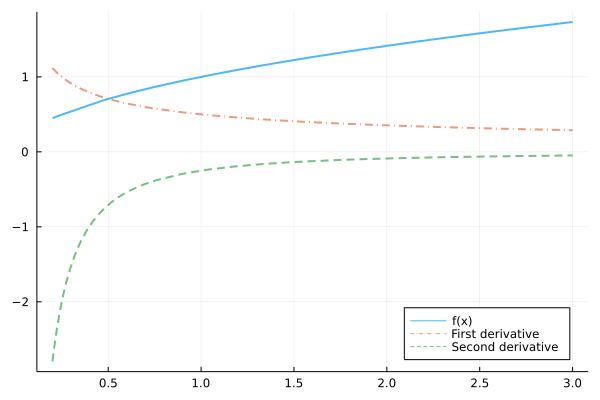

In [255]:
plot(Y, 0.2, 3, label = "f(x)", lw = 2, alpha = 0.7)
plot!(diff_1, 0.2, 3, label = "First derivative", lw = 2, ls = :dashdot, alpha = 0.7)
plot!(diff_2, 0.2, 3, label = "Second derivative", legend = :bottomright, lw = 2, ls = :dash, alpha = 0.7)

We see that the first derivative is positive, which indicates that the slope of the function is always positive. In terms of the curvature though, the second derivative is always negative, which indicates that the slope of the function is positive but decreasing with an increase in labour. This means that the marginal return to labour is positive but decreasing with an increase in labour. 

## Multivariate calculus

### Partial derivatives

Say that we have a function where there are two inputs. In other words, let $f(x, y)$ be a function of two variables. Then the partial derivative of a function $f$ with respect to the variable $x$, can be written as $\frac{\partial{f}}{\partial{x}}$, which is defined as,

$$
\dfrac{∂f}{∂x}=f_x(x,y)=\lim_{h→0}\dfrac{f(x+h,y)−f(x,y)}{h}
$$

In this definition we see a new symbol, $\partial$, which indicates a partial derivative. In this case we can also write the derivative with respect to $y$ so there are two partial derivatives for this function, since it is a function of two variables. 

If we wanted to calculate the partial derivative for our some function we would have to do the following. Consider the following function, 

$$
f(x,y)=x^2−3xy+2y^2−4x+5y−12
$$

The partial derivative of $f$ with respect to $x$ can be calculated using our definition above. First calculate $f(x + h, y)$,

$$
\begin{align*} f(x+h,y) &=(x+h)^2−3(x+h)y+2y^2−4(x+h)+5y−12 \\ &=x^2+2xh+h^2−3xy−3hy+2y^2−4x−4h+5y−12. \end{align*} 
$$

Now we need to substitute this into our initial equation above and then simplify, 

$$
\begin{align*} \dfrac{∂f}{∂x} &=\lim_{h→0}\dfrac{f(x+h,y)−f(x,y)}{h} \\ 
&=\lim_{h→0}\dfrac{(x^2+2xh+h^2−3xy−3hy+2y^2−4x−4h+5y−12)−(x^2−3xy+2y^2−4x+5y−12)}{h} \\ &=\lim_{h→0}\dfrac{x^2+2xh+h^2−3xy−3hy+2y^2−4x−4h+5y−12−x^2+3xy−2y^2+4x−5y+12}{h} \\ 
&=\lim_{h→0}\dfrac{2xh+h^2−3hy−4h}{h}\\ 
&=\lim_{h→0}\dfrac{h(2x+h−3y−4)}{h} \\ 
&=\lim_{h→0}(2x+h−3y−4) \\ 
&=2x−3y−4. \end{align*}
$$


The same thing can be done for the partial derivative for $f$ with respect to $y$. As an exercise, you might want to try and do this for $y$. The answer should be $-3x + 4y + 5$. 

Now, we won't always use this method to find the partial derivative. There are easier ways than using this definition above. For the partial derivative, we can think about it as taking a derivative of the one variable while holding the other constant. Exactly like we did for our example with the Cobb-Douglas production function.  

So the easier way to take a partial derivative of $f$ with respect to $x$ would be to treat the variable $y$ like it was a constant and apply the usual single variable calculus rules. 

Let us consider the individual components of the function. 

In the case of $x^{2}$, we would have that the derivative is $2x$. 

For $-3xy$ we treat the $y$ like a constant, so the derivative is $-3y$.

The next term, $2y^2$ falls away completely since it is constant. The same is true for $5y$ and $12$.

Finally, we are left with $-4x$, with a derivative given by $-4$. 

If we then add these components together, we get our answer $2x - 3y - 4$

In [287]:
@variables x y

l = x^2 − 3x*y + 2y^2 − 4x + 5y − 12

H = Differential(x);
I = Differential(y);

In [285]:
expand_derivatives(H(l))

2x - 4 - 3y

## Matrix algebra

We end the session with some basic matrix algebra and then start with optimisation in the next tutorial. Optimisation is going to be applied to one specific example, the consumer problem. 